In [1]:
import pandas as pd
import numpy as np

In [2]:
messages = pd.read_json("messages2.json")
messages.columns
messages.tail()


,type,text,files,upload,user,display_as_bot,ts,blocks,client_msg_id,thread_ts,...,upload_reply_to,comment,is_intro,file,username,icons,old_name,name,topic,purpose
1399,message,<@U0A9R3Y78> has joined the channel,NaN,NaN,U0A9R3Y78,NaN,1.460640e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,message,<@U09HDCLNL> has joined the channel,NaN,NaN,U09HDCLNL,NaN,1.460640e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,message,<@U0A75UE3H> has joined the channel,NaN,NaN,U0A75UE3H,NaN,1.460640e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,message,set the channel description: post dank memes,NaN,NaN,U09HKQMH9,NaN,1.460640e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post dank memes
1403,message,<@U09HKQMH9> has joined the channel,NaN,NaN,U09HKQMH9,NaN,1.460640e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import json

with open("users.json", "r", encoding="utf8") as f:
    userplot = json.loads(f.read())

In [21]:
userplot[np.nan] = "NaN"
messages["username"] = messages["user"].apply(lambda x: userplot[x])

posted_per_user = messages.groupby("username").size()
posted_per_user = posted_per_user.sort_values()
posted_per_user.tail(20)
messages.iloc[[999]]

,type,text,files,upload,user,display_as_bot,ts,blocks,client_msg_id,thread_ts,...,comment,is_intro,file,username,icons,old_name,name,topic,purpose,timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-18,message,<@U2APCBT53|mdreyer> uploaded a file: <https:/...,"[{'id': 'F5VETFQR0', 'created': 1497787933, 't...",1.0,U2APCBT53,0.0,1.497788e+09,"[{'type': 'rich_text', 'block_id': 'AnCMG', 'e...",NaN,NaN,...,NaN,NaN,NaN,Marius Sørensen Dreyer,NaN,NaN,NaN,NaN,NaN,2017-06-18


In [5]:
day_divider = 86400
messages['timestamp'] = ((messages['ts'])/day_divider).values.astype(dtype='datetime64[D]')


In [6]:
messages.index = pd.to_datetime(messages['timestamp'],format='%m/%d/%y %I:%M%p')
posted_per_month = messages['timestamp'].groupby(pd.Grouper(freq='M')).size()
posted_per_month.tail(20)

timestamp
2022-04-30     7
2022-05-31    17
2022-06-30     2
2022-07-31     0
2022-08-31     5
2022-09-30    31
2022-10-31    50
2022-11-30    42
2022-12-31     5
2023-01-31    21
2023-02-28    23
2023-03-31    15
2023-04-30    10
2023-05-31     6
2023-06-30     2
2023-07-31     0
2023-08-31     6
2023-09-30    13
2023-10-31    12
2023-11-30     8
Freq: M, Name: timestamp, dtype: int64

<AxesSubplot: xlabel='timestamp'>

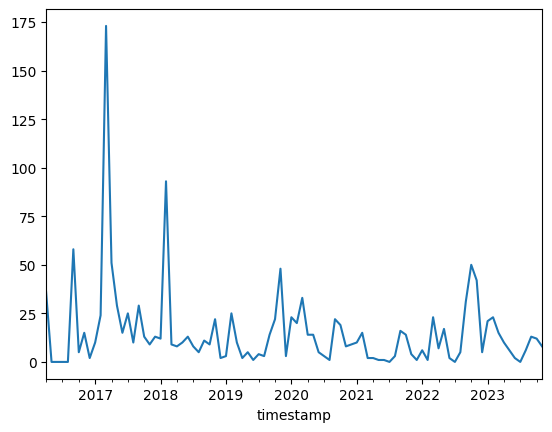

In [7]:
import matplotlib.pyplot as plt
posted_per_month.plot()

<AxesSubplot: xlabel='username'>

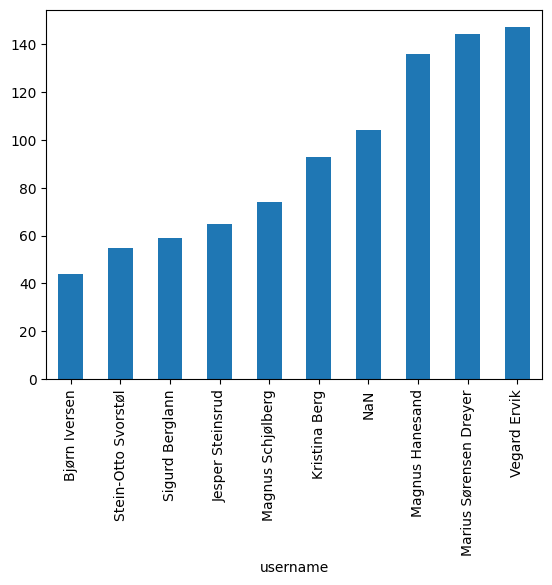

In [8]:

posted_per_user.tail(10).plot(kind="bar")

<AxesSubplot: xlabel='timestamp'>

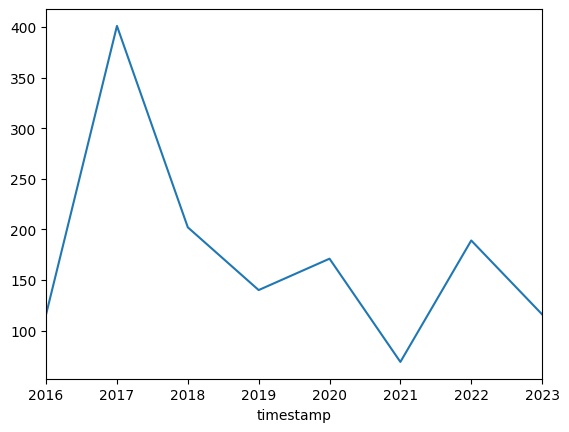

In [9]:
posted_per_month = messages['timestamp'].groupby(pd.Grouper(freq='Y')).size()
posted_per_month.plot()

C:\Users\Vegard\AppData\Local\Temp\ipykernel_20960\2397815465.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x in posted_per_user.iteritems():


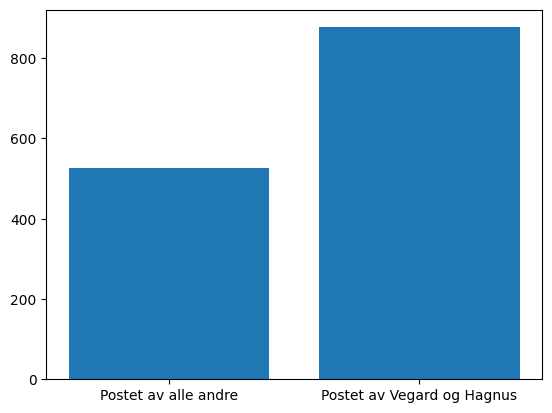

In [10]:
liste = [0,0]

def add_liste(nummer):
    if nummer[1] < 50:
        liste[0] += nummer[1]
    else:
        liste[1] += nummer[1]

for x in posted_per_user.iteritems():
    add_liste(x)

dig, ax = plt.subplots()
ax.bar(["Postet av alle andre", "Postet av Vegard og Hagnus"], liste)

plt.show()

In [46]:
def get_reactions(item):
    if item["reactions"] is np.nan:
        return 0
    return sum([react["count"] for react in item["reactions"]])

In [47]:

messages["reaction_count"] = messages.apply(get_reactions, axis = 1)
messages = messages.sort_values(by="reaction_count", ascending=False)
print(messages.head(5))

               type            text  \
timestamp                             
2023-01-26  message    :sunglasses:   
2021-10-01  message  Viljan på I/O:   
2023-09-12  message                   
2019-11-05  message                   
2022-04-20  message                   

                                                        files  upload  \
timestamp                                                               
2023-01-26  [{'id': 'F04LJPY0145', 'created': 1674725376, ...     0.0   
2021-10-01  [{'id': 'F02GSRLBDJM', 'created': 1633120557, ...     0.0   
2023-09-12  [{'id': 'F05SDU8HLQZ', 'created': 1694541211, ...     0.0   
2019-11-05  [{'id': 'FQ64PMQ84', 'created': 1572980351, 't...     1.0   
2022-04-20  [{'id': 'F03CLB8HQUR', 'created': 1650468063, ...     0.0   

                   user  display_as_bot            ts  \
timestamp                                               
2023-01-26  U041S01C4VD             0.0  1.674725e+09   
2021-10-01  U02ESKAEE3B             0.0  1.